In [2]:
from keras.datasets import boston_housing

Using TensorFlow backend.


In [0]:
(train_data, train_targets),(test_data, test_targets)=boston_housing.load_data()

In [12]:
train_data.shape


(404, 13)

In [0]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std 

In [0]:
from keras import models
from keras import layers


def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',
  input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [0]:
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [22]:
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  
  partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
 
  model = build_model()
  model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
  
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [17]:
all_scores

[2.009400753691645, 2.223000974938421, 2.8054500192698866, 2.277775566176613]

In [18]:
np.mean(all_scores)

2.328906828519141

In [25]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  
  partial_train_data = np.concatenate( [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],  axis=0)
  
  partial_train_targets = np.concatenate( [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
  
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)
  
  mae_history = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [27]:
print(average_mae_history)

[4.522847414016724, 3.3346413291326846, 3.0042955143616936, 2.8518961254913027, 2.8377920955714613, 2.80061143341631, 2.7438161656408027, 2.7944909959736437, 2.617667503876261, 2.5923736355092264, 2.602874783006045, 2.4867757051297934, 2.5343126719540887, 2.6523257470366977, 2.531678245799376, 2.47237493142043, 2.5862857764310174, 2.456768869173409, 2.4181230351476386, 2.609746309790281, 2.459485619375021, 2.507103039486574, 2.403031293708499, 2.505184330562554, 2.4848643494124456, 2.4723154141171144, 2.4781272517572535, 2.4576682820178495, 2.555376136657035, 2.4008557052895574, 2.683915150047529, 2.438981805697526, 2.413237289627, 2.408750660348647, 2.329060156746666, 2.3628105940205035, 2.386598253014064, 2.4142433192470287, 2.4966036671459086, 2.603919812948397, 2.3756958812770277, 2.4255250586141455, 2.543832233636686, 2.4466258617911008, 2.347664574585339, 2.498955193132457, 2.492205295232263, 2.4141109768706976, 2.520944045321776, 2.393396501493926, 2.4925006875897395, 2.39521723

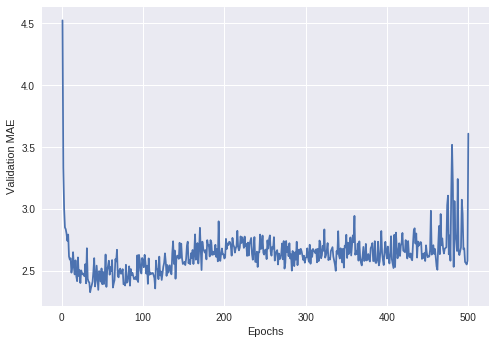

In [28]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

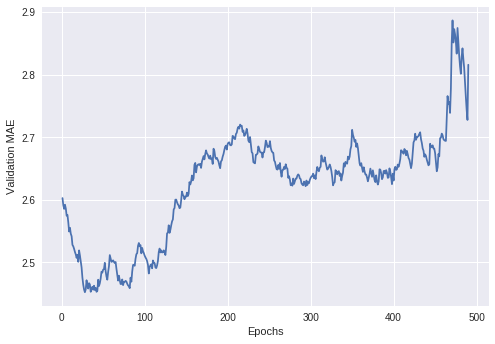

In [31]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [32]:
#training the final model
model = build_model()
model.fit(train_data, train_targets,epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 3ms/step


In [33]:
test_mae_score

2.9368459383646646

In [34]:
test_mse_score

23.77299679026884